In [2]:
import requests
from bs4 import BeautifulSoup as BS

In [3]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

# Question

Over the past couple of years during the COVID-19 pandemic, many people on twitter, as well as journalists from well-known journalistic insitituions spread the idea that we can predict COVID spikes based on the number of negative reviews for candles, implying that people who lose their ability to smell during COVID will leave negative candle reviews before knowing about their infection. Can we predict COVID-19 spikes and outbreaks from customer reviews of Yankee Candles on Amazon, or is this just an example of misinformation?

### Data Collection
I got the COVID-19 Data (Until Nov. 19, 2022) from https://ourworldindata.org/coronavirus/country/united-states. The process of aquiring the candle review data is below.

In [4]:
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})
r = requests.get("https://www.amazon.com/Yankee-Candle-Large-Lilac-Blossoms/product-reviews/B000WQY7RO/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1", headers=HEADERS)
print(r.status_code)

200


In [10]:
soup = BS(r.content, "html.parser")


In [17]:
next_link = soup.select("#cm_cr-pagination_bar a")[0]["href"]

In [20]:
r2 = requests.get("https://amazon.com" + next_link, headers=HEADERS)
print(r2.status_code)
#This code block allows the parser to go onto the next page of reviews.

200


In [56]:
review_scores = soup.select("#cm_cr-review_list .review-rating")
review_scores_clean = [x.find("span").text[0] for x in review_scores]
review_dates = soup.select("#cm_cr-review_list .review-date")
review_dates_clean = [x.text.split("on ")[-1] for x in review_dates]
review_scent = soup.select(".a-size-mini.a-color-secondary")
review_scent_clean = [x.text.split("Size")[0][7:] for x in review_scent]
#This code block shows the selection process for the rating out of 5, date, and scent for each review on amazon.

In [71]:
output = []
url = "https://www.amazon.com/Yankee-Candle-Large-Lilac-Blossoms/product-reviews/B000WQY7RO/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1"
for j in range(499):
    r2 = requests.get(url, headers=HEADERS)
    if r2.status_code != 200:
        print("it broke", r2.status_code)
        break
    soup = BS(r2.content, "html.parser")
    review_scores = soup.select("#cm_cr-review_list .review-rating")
    review_scores_clean = [x.find("span").text[0] for x in review_scores]
    review_dates = soup.select("#cm_cr-review_list .review-date")
    review_dates_clean = [x.text.split("on ")[-1] for x in review_dates]
    review_scent = soup.select(".a-size-mini.a-color-secondary")
    review_scent_clean = [x.text.split("Size")[0][7:] for x in review_scent]
    for i in range(len(review_scores_clean)):
        try:
            output.append([review_scores_clean[i], review_dates_clean[i], review_scent_clean[i]])
        except:
            print(url)
    next_link = soup.select(".a-last a")[0]["href"]
    url = "https://amazon.com" + next_link
output


https://amazon.com/Yankee-Candle-Large-Lilac-Blossoms/product-reviews/B000WQY7RO/ref=cm_cr_arp_d_paging_btm_29?ie=UTF8&pageNumber=29&reviewerType=all_reviews&sortBy=recent
https://amazon.com/Yankee-Candle-Large-Lilac-Blossoms/product-reviews/B000WQY7RO/ref=cm_cr_arp_d_paging_btm_33?ie=UTF8&pageNumber=33&reviewerType=all_reviews&sortBy=recent
https://amazon.com/Yankee-Candle-Large-Lilac-Blossoms/product-reviews/B000WQY7RO/ref=cm_cr_arp_d_paging_btm_57?ie=UTF8&pageNumber=57&reviewerType=all_reviews&sortBy=recent
https://amazon.com/Yankee-Candle-Large-Lilac-Blossoms/product-reviews/B000WQY7RO/ref=cm_cr_arp_d_paging_btm_72?ie=UTF8&pageNumber=72&reviewerType=all_reviews&sortBy=recent
https://amazon.com/Yankee-Candle-Large-Lilac-Blossoms/product-reviews/B000WQY7RO/ref=cm_cr_arp_d_paging_btm_79?ie=UTF8&pageNumber=79&reviewerType=all_reviews&sortBy=recent
https://amazon.com/Yankee-Candle-Large-Lilac-Blossoms/product-reviews/B000WQY7RO/ref=cm_cr_arp_d_paging_btm_84?ie=UTF8&pageNumber=84&reviewe

[['1', 'November 18, 2022', 'Pink Sands'],
 ['5', 'November 18, 2022', 'White Gardenia'],
 ['5', 'November 16, 2022', 'Pink Sands'],
 ['5', 'November 15, 2022', 'Pink Sands'],
 ['5', 'November 15, 2022', 'Pink Sands'],
 ['5', 'November 15, 2022', 'Fresh Cut Roses'],
 ['1', 'November 14, 2022', 'Pink Sands'],
 ['5', 'November 14, 2022', 'Lilac Blossoms'],
 ['5', 'November 13, 2022', 'Lavender Vanilla'],
 ['5', 'November 10, 2022', 'Pink Sands'],
 ['5', 'November 10, 2022', 'Pink Sands'],
 ['5', 'November 10, 2022', 'Pink Sands'],
 ['1', 'November 9, 2022', 'Fresh Cut Roses'],
 ['5', 'November 8, 2022', 'Lavender Vanilla'],
 ['5', 'November 8, 2022', 'Pink Sands'],
 ['5', 'November 7, 2022', 'Pink Sands'],
 ['5', 'November 6, 2022', 'Pink Sands'],
 ['2', 'November 5, 2022', 'Pink Sands'],
 ['2', 'November 2, 2022', 'Pink Sands'],
 ['5', 'October 30, 2022', 'Pink Sands'],
 ['1', 'October 30, 2022', 'Lavender Vanilla'],
 ['3', 'October 30, 2022', 'Fresh Cut Roses'],
 ['1', 'October 29, 202

In [120]:
import csv
with open("candle_data.csv", "w", newline = "") as f:
    writer = csv.writer(f, dialect= "excel")
    writer.writerow(["Score", "Date", "Scent"])
    writer.writerows(output)

### Data Collection Analysis
The data collection went relatively smoothly. One thing I would improve if I had the ability to is that I would maybe try to work with text in the reviews. I think it would be interesting to pull the reviews that specifically mentioned "no smell" or "bad scent" and compare the number of those to other reviews. 
I got reviews from a few different scents of candle to try to get rid of biases that might arise from one specific candle just being objectively bad.
I excluded holiday scents because I wanted reviews that spanned the whole year. 

### Data Cleaning

In [4]:
covid_df = pd.read_csv(r'owid-covid-data.csv')
candle_df = pd.read_csv(r'candle_data.csv')

In [5]:
covid_df = covid_df.rename(columns={'date': 'Date'})

In [6]:
covid_df.isnull().sum()


iso_code                          0
continent                         0
location                          0
Date                              0
total_cases                       0
new_cases                         1
new_cases_smoothed                6
total_cases_per_million           0
new_cases_per_million             1
new_cases_smoothed_per_million    6
dtype: int64

In [7]:
candle_df.isnull().sum()

Score    0
Date     0
Scent    0
dtype: int64

In [8]:
covid_df.dtypes
candle_df.dtypes

Score     int64
Date     object
Scent    object
dtype: object

In [9]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'])


In [10]:
candle_df['Date'] = pd.to_datetime(candle_df['Date'])

In [11]:
average_scores = candle_df.groupby('Date').agg(avg_score=('Score','mean')).reset_index()
average_scores
#In this section, I calculated the average rating given by reviewers on each day.

,Date,avg_score
0,2016-02-16,4.0
1,2016-02-17,4.0
2,2016-02-19,5.0
3,2016-02-20,5.0
4,2016-02-24,5.0
...,...,...
1898,2022-11-13,5.0
1899,2022-11-14,3.0
1900,2022-11-15,5.0
1901,2022-11-16,5.0


In [14]:
average_scores["rolling_avg"] = average_scores["avg_score"].rolling(14).mean()
#In this step, I calculated the 14-day rolling average of scores in order to smooth the data and show spikes and decreases more clearly.

In [13]:
average_scores["Date"] = pd.to_datetime(average_scores['Date'])
#Converting the dates to the datetime type.

In [12]:
scores = candle_df.groupby('Date', as_index=False).value_counts(subset=["Score"])
scores = scores.pivot(columns="Score", index="Date").fillna(0).astype(int).reset_index()
scores_prop = candle_df.groupby('Date', as_index=False).value_counts(subset=["Score"], normalize=True)
scores_prop = scores_prop.pivot(columns="Score", index="Date").fillna(0).reset_index()
scores = scores.merge(scores_prop, on="Date")
#for example: get date and count 5 columns scores[[("Date", ""), ("count", 5)]]
scores.columns = scores.columns.to_flat_index()
mapper = {}
for col in list(scores.columns):
    mapper[col] = (col[0] + " " + str(col[1])).strip()
mapper
scores.rename(inplace=True, columns=mapper)
scores["prop lt 3"] = scores["proportion 1"] + scores["proportion 2"] + scores["proportion 3"]
scores
scores["rolling lt 3"] = scores["prop lt 3"].rolling(14).mean()

#This code block is where I calculated the columns for the proportion of each rating value on each given day. 
#I also calulcated the proportion of ratings less than or equal to 3 stars.

/var/folders/nb/_99pgkrj3jl2sqsz7chsy4mc0000gn/T/ipykernel_10060/1602738379.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  scores = scores.merge(scores_prop, on="Date")


In [15]:
merged = pd.merge(covid_df, average_scores, how='inner', on='Date')
merged = pd.merge(merged, scores, how = "inner", on = 'Date')
merged_df = pd.DataFrame(data = merged)
merged_df.dropna()
merged_df.head()
merged_df.to_csv("merged.csv")
#Here, I merged the candle data and the covid data into one csv so that the dates were aligned.


### Data Cleaning Analysis
The data cleaning went pretty well, there was not too much missing data to deal with and it was pretty simple to manipulate the data that I wanted to work with.

### Data Visualization

In [16]:
final_df = pd.read_csv("merged.csv")


In [17]:
df = final_df.dropna().drop(columns=["Unnamed: 0"])

In [18]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,avg_score,rolling_avg,count 1,count 2,count 3,count 4,count 5,proportion 1,proportion 2,proportion 3,proportion 4,proportion 5,prop lt 3,rolling lt 3
count,9.050000e+02,9.050000e+02,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,3.945958e+07,9.773072e+04,97131.979326,116644.290001,288.896386,287.126499,3.826304,3.832409,0.562431,0.182320,0.190055,0.167956,1.805525,0.195500,0.065595,0.067423,0.060062,0.611419,0.328519,0.326732
std,3.286981e+07,1.354856e+05,121623.073445,97164.624811,400.501390,359.523256,1.163812,0.439342,0.751637,0.434819,0.437853,0.410685,1.430457,0.278223,0.182597,0.183608,0.172548,0.350572,0.339082,0.120097
min,5.000000e+00,0.000000e+00,0.000000,0.015000,0.000000,0.000000,1.000000,2.665023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032143
25%,7.093261e+06,2.824000e+04,35537.143000,20967.998000,83.479000,105.049000,3.000000,3.571429,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.246429
50%,3.326118e+07,5.821800e+04,64340.571000,98321.526000,172.095000,190.194000,4.000000,3.859524,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.250000,0.322619
75%,7.745840e+07,1.231420e+05,115386.714000,228970.507000,364.013000,341.088000,5.000000,4.142857,1.000000,0.000000,0.000000,0.000000,3.000000,0.333333,0.000000,0.000000,0.000000,1.000000,0.500000,0.400595
max,9.830147e+07,1.355241e+06,805865.286000,290583.564000,4006.153000,2382.174000,5.000000,4.834439,5.000000,3.000000,3.000000,2.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.641667


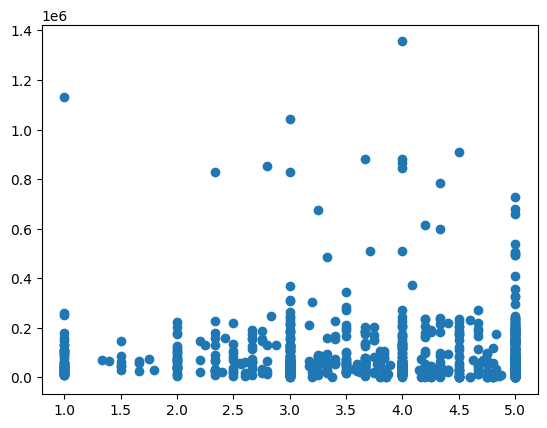

In [19]:
plt.scatter(final_df['avg_score'], final_df['new_cases'])
#this is a scatter plot with the average score on each day on the x-axis and the number of new cases for the day on the y-axis.
#For the rumor to be true, I would have wanted to see some correlation where an increase in average score resulted in a decrease in new cases.
#However, this is obviously not the case and this gave me my frist doubts about the rumor.

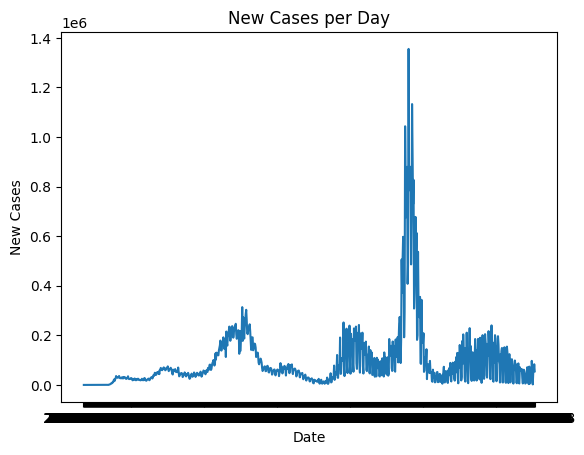

In [20]:
x_axis = final_df["Date"]
y_axis = final_df["new_cases"]

plt.plot(x_axis, y_axis)
plt.title('New Cases per Day')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
#This is simply a graph of the number of new cases per day on the y-axis with the date on the x-axis. This graph should look familiar.

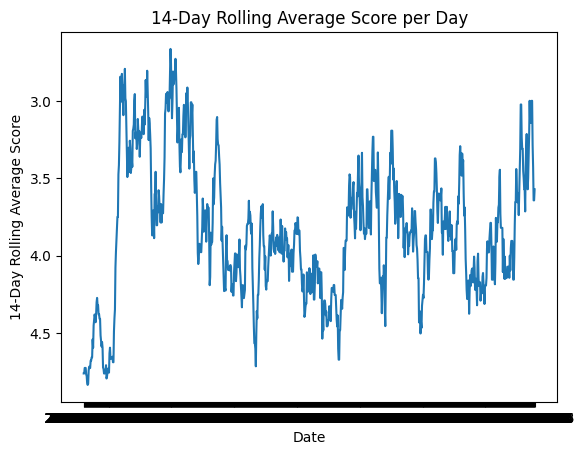

In [49]:
x_axis = final_df["Date"]
y_axis = final_df["rolling_avg"]
plt.gca().invert_yaxis()
plt.plot(x_axis, y_axis)
plt.title('14-Day Rolling Average Score per Day')
plt.xlabel('Date')
plt.ylabel('14-Day Rolling Average Score')
plt.show()
#This is a graph of the 14 day-rolling average graphed as a function of the date. I flipped the y-axis to show a lower average score at the top.
#This should allow spikes in bad reviews to align with spikes in COVID.

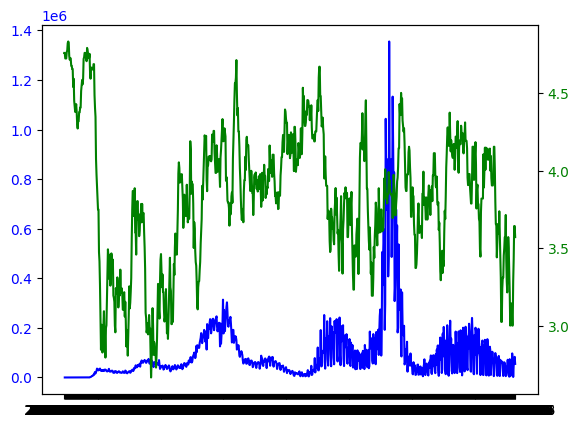

In [21]:
fig, ax = plt.subplots()

x_axis1 = final_df["Date"]
y_axis1 = final_df["new_cases"]
x_axis2 = final_df["Date"]
y_axis2 = final_df["rolling_avg"]
# Plot linear sequence, and set tick labels to the same color
ax.plot(x_axis1, y_axis1, color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(x_axis2, y_axis2, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()
#This visual shows the above two graphs overlaid on each other.
#I suppose that there are some parts where a rise in bad reviews (green) preceeds a rise in cases (blue), 
# but the correlation does not appear to be too strong

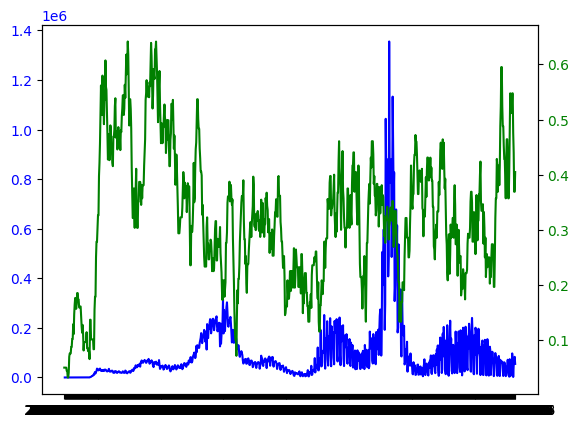

In [22]:
fig, ax = plt.subplots()

x_axis1 = final_df["Date"]
y_axis1 = final_df["new_cases"]
x_axis2 = final_df["Date"]
y_axis2 = final_df["rolling lt 3"]
# Plot linear sequence, and set tick labels to the same color
ax.plot(x_axis1, y_axis1, color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(x_axis2, y_axis2, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()
#This is a graph with the same idea as above, but the green line represents the proportion of ratings for the day that were 1, 2, or 3 star reviews
#Again, there does not appear to be any real relationship. We can figure this our definitively in the data modeling step.

### Data Visualization Analysis
This step reveals that on the surface, the number of new covid cases does not seem to follow the ratings of candles on amazon. It is possible that I did not consider some important variables that could have shown a relationship, but as of now there appears to be none.

### Data Modeling

Mean Squared Error: 18319614360.926228
Y = -11963.805152981244 * x + 101661.0543789865
r^2 = 0.0008965238037152989


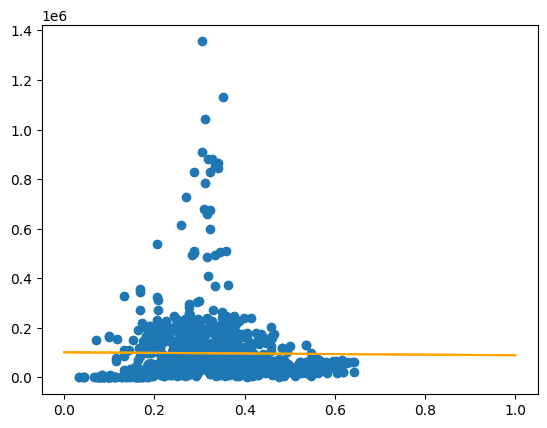

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn
final_df.dropna(inplace= True)
prop = final_df["prop lt 3"].values.reshape(-1, 1)
cases = final_df["new_cases"].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X = prop, y = cases)
y_pred = model.predict(prop)
print("Mean Squared Error:", mean_squared_error(cases, y_pred))
print(f"Y = {model.coef_[0][0]} * x + {model.intercept_[0]}")
plt.scatter(final_df['rolling lt 3'], final_df['new_cases'])
x = np.linspace(0, 1)
y = np.vectorize(lambda x: x * model.coef_ + model.intercept_)(x)
plt.plot(x, y, color="orange")
plt.plot(x, y, color="orange")

r2 = sklearn.metrics.r2_score(cases, y_pred)
print(f"r^2 = {r2}")
#This step calculates a linear regression, where the predictor is the rolling proportion of reviews less than or equal to 3 stars.
#The r^2 value is incredibly low at 0.0009, which means that 0.09% of the change in covid cases can be attributed to the change in rating.
#It also seems that the slope of the line is negative (although very slightly)
#This seems to pretty much disprove the theory that candle ratings can be used to predict covid spikes.

In [24]:
X = []
y = []
for i in range(14, len(df)):
    X.append(df.iloc[i - 14: i, 4:])
    y.append(df["new_cases"].iloc[i])
X = np.array(X)
y = np.array(y)
X

array([[[5.00000000e+00, 0.00000000e+00, 5.71000000e-01, ...,
         5.00000000e-01, 2.50000000e-01, 4.40476190e-02],
        [6.00000000e+00, 1.00000000e+00, 7.14000000e-01, ...,
         1.00000000e+00, 0.00000000e+00, 4.40476190e-02],
        [6.00000000e+00, 0.00000000e+00, 7.14000000e-01, ...,
         1.00000000e+00, 0.00000000e+00, 3.21428571e-02],
        ...,
        [1.20000000e+01, 0.00000000e+00, 5.71000000e-01, ...,
         8.00000000e-01, 2.00000000e-01, 1.01955782e-01],
        [1.20000000e+01, 0.00000000e+00, 5.71000000e-01, ...,
         1.00000000e+00, 0.00000000e+00, 1.01955782e-01],
        [1.20000000e+01, 0.00000000e+00, 1.43000000e-01, ...,
         5.00000000e-01, 3.75000000e-01, 1.28741497e-01]],

       [[6.00000000e+00, 1.00000000e+00, 7.14000000e-01, ...,
         1.00000000e+00, 0.00000000e+00, 4.40476190e-02],
        [6.00000000e+00, 0.00000000e+00, 7.14000000e-01, ...,
         1.00000000e+00, 0.00000000e+00, 3.21428571e-02],
        [8.00000000e+00, 

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential([
    Flatten(input_shape=X[0].shape),
    Dense(128),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.1),
    Dense(1)
])
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X, y, validation_split=0.5, epochs=500)


ModuleNotFoundError: No module named 'tensorflow'

28/28 [==============================] - 0s 1ms/step
0.5724638659499096


,0,y,error
0,11.712314,1.0,10.712314
1,12.869979,0.0,inf
2,9.946904,1.0,8.946904
3,9.921865,0.0,inf
4,12.075673,0.0,inf
...,...,...,...
886,28759.625000,2079.0,12.833393
887,19534.933594,48634.0,0.598328
888,17715.574219,58218.0,0.695703
889,23644.742188,83306.0,0.716170


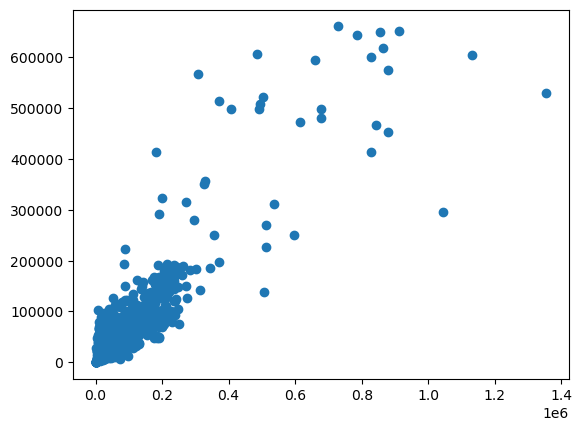

In [148]:
o = pd.DataFrame(model.predict(X))
o["y"] = y
o["error"] = np.abs(o[0] - o["y"]) / o["y"]
print(o[o["error"] != float("inf")]["error"].mean())
plt.scatter(y, o[0])
o

### Tensorflow Analysis
As the saying goes, garbage in, garbage out. Given there is nearly 0 correlation between the input data and the output data, it isn't a surprise that the model is entirely useless. The model could be farther optimized to get slightly better results, or a recurrent neural network architecture could be utilized. However, this likely isn't worth the effort given the lack of evidence for a link between these two variables

## Final Thoughts:
Overall, it doesn't really seem that there is any relationship between the ratings recieved by candles and the number of new covid cases. As I mentioned earlier, it is possible that digging deeper into the text of the reviews could reveal some more insights, but given the information I collected, it appears that this rumor is false. 
This is an example of a cool and fun phenomenon that has been discussed several times on twitter and other parts of the internet during the pandemic so far, but I am sure that there are other predictive factors studied by epidemiologists and scientsts that can allow us to better predict and prepare for COVID infection spikes.